In [1]:
import csv
import pandas as pd

recommend_reviews

In [2]:
recommend_reviews = pd.read_csv('D:/论文记录/shuju/recommend_reviews(1).csv')

In [5]:
column_names = ['city', 'restaurant', 'username','location', 'has_profile', 'friend','review', 'photo', 'text','date', 'rating']  # 替换为您的列名
recommend_reviews.columns = column_names

In [17]:
table = recommend_reviews.head()
display(table)

,city,restaurant,username,location,has_profile,friend,review,photo,text,date,rating
0,Alameda,Jong Ga House,Ernesto B.,"Oakland, CA",https://s3-media0.fl.yelpcdn.com/assets/srv0/y...,0,1,NaN,"Amazing food, great people, good music. Strong...",8/25/2023,5
1,Alameda,Jong Ga House,Katrina F.,"San Francisco, CA",https://s3-media0.fl.yelpcdn.com/photo/ae0oaUG...,914,101,410.0,"4 days prior, I called in a reservation for a ...",9/7/2023,5
2,Alameda,Jong Ga House,Mario V.,"San Francisco, CA",https://s3-media0.fl.yelpcdn.com/photo/qucKhqI...,86,13,2.0,Edit: TLDR - <br>FORMER LOYAL CUSTOMER. <br>CO...,9/5/2023,1
3,Alameda,Jong Ga House,Giselle A.,"Martinez, CA",https://s3-media0.fl.yelpcdn.com/photo/wcOjnyL...,240,15,NaN,"If you&#39;re looking for Korean BBQ, your sea...",9/4/2023,5
4,Alameda,Jong Ga House,Seth E.,"Dublin, CA",https://s3-media0.fl.yelpcdn.com/photo/7QNmVGQ...,249,40,76.0,This is my second time here and we had made a ...,8/30/2023,4


In [18]:
recommend_reviews.shape

(438453, 11)

In [6]:
recommend_reviews[['restaurant','city']].nunique()

restaurant    735
city           50
dtype: int64

non_recommend_reviews

In [3]:
non_recommend_reviews = pd.read_csv('D:/论文记录/shuju/不推荐评论.csv')

In [4]:
column_names = ['city', 'restaurant', 'username','text','location','rating', 'has_profile', 'date', 'friend','review', 'photo' ]  # 替换为您的列名
non_recommend_reviews.columns = column_names

In [9]:
table = non_recommend_reviews.head()
display(table)

,city,restaurant,username,text,location,rating,has_profile,date,friend,review,photo
0,Alameda,Jong Ga House,cher b.,First don't come here !!! Very bad food ...The...,"Berkeley, CA",1.0,https://s3-media0.fl.yelpcdn.com/photo/rxHTvp3...,8/23/2017,29,21,NaN
1,Alameda,Jong Ga House,Khristy W.,This place smells bad and the service is bad. ...,"Richmond, CA",1.0,https://s3-media0.fl.yelpcdn.com/photo/1BdGk-s...,2/5/2014,218,8,16.0
2,Alameda,Jong Ga House,Brittany T.,I came to the spot because I heard of all the ...,"Oakland, CA",2.0,https://s3-media0.fl.yelpcdn.com/assets/srv0/y...,11/5/2015,0,31,NaN
3,Alameda,Jong Ga House,Daniel M.,Lots banchan but nothing to eat. Kimchee was t...,"Lafayette, CA",2.0,https://s3-media0.fl.yelpcdn.com/photo/-ciyPmr...,3/5/2013,2,4,NaN
4,Alameda,Jong Ga House,Annie E.,First i want to say thanks for the delicious s...,"Los Angeles, CA",3.0,https://s3-media0.fl.yelpcdn.com/photo/mNN0Icd...,8/28/2018,49,5,1.0


In [10]:
non_recommend_reviews.shape

(44386, 11)

In [11]:
non_recommend_reviews[['restaurant','city']].nunique()

restaurant    695
city           50
dtype: int64

In [2]:
non_recommend_reviews = pd.read_csv('BL_review.csv')

In [3]:
column_names = ['city', 'restaurant', 'username','text','location','rating', 'has_profile', 'date', 'friend','review', 'photo' ]  # 替换为您的列名
non_recommend_reviews.columns = column_names

In [15]:
table = non_recommend_reviews.head()
display(table)

,city,restaurant,username,text,location,rating,has_profile,date,friend,review,photo,local
0,Los Angeles,Bottega Louie,James A.,Rude managers.Outdated food and ambiance.0/5 s...,"Los Angeles, CA",1.0,1,11/3/2023,302,70,23.0,1
1,Los Angeles,Bottega Louie,Alexis L.,Bad attitude's EVERYWHERE. Been wanting to com...,"Central LA, Los Angeles, CA",1.0,1,7/6/2023,1,36,30.0,1
2,Los Angeles,Bottega Louie,Peter G.,I am hesitant to write this review for two rea...,"Los Angeles, CA",1.0,1,4/12/2023,599,29,6.0,1
3,Los Angeles,Bottega Louie,Costcopay U.,Of all the ribbon Colors that are on display h...,"Downtown, Los Angeles, CA",1.0,0,3/12/2023,0,1,1.0,1
4,Los Angeles,Bottega Louie,Pradeep M.,Very expensive for average food,"Irvine, CA",1.0,1,3/8/2023,151,5,0.0,0


In [6]:
non_recommend_reviews['has_profile'] = ~non_recommend_reviews['has_profile'].str.contains('default_avatars').astype(int)
non_recommend_reviews['has_profile'] = non_recommend_reviews['has_profile'].replace({-1: 1, -2: 0})

In [8]:
non_recommend_reviews['has_profile'].value_counts()

1    2564
0    1355
Name: has_profile, dtype: int64

In [9]:
na_count = non_recommend_reviews['location'].isna().sum()
print("The number of NaN:", na_count)

The number of NaN: 4


In [10]:
def check_local(row):
    if isinstance(row['location'], str):
        return 1 if row['location'].lower().find(row['city'].lower()) >= 0 else 0
    else:
        return 0

non_recommend_reviews['local'] = non_recommend_reviews.apply(check_local, axis=1)

In [11]:
non_recommend_reviews['local'].value_counts()

1    2010
0    1909
Name: local, dtype: int64

In [12]:
na_count = non_recommend_reviews['photo'].isna().sum()
print("The number of NaN:", na_count)

The number of NaN: 2636


In [13]:
non_recommend_reviews['photo'].fillna(0, inplace=True)

In [14]:
import re
import html

def remove_non_ascii(text):
    # 先解码 HTML 实体编码，然后再去除非 ASCII 字符
    text = html.unescape(str(text))
    return re.sub(r'[^\x00-\x7F]+', '', text)

# 在应用函数之前，确保 'text' 列中的所有值都是字符串
non_recommend_reviews['text'] = non_recommend_reviews['text'].apply(remove_non_ascii)

merge

In [5]:
reviews = pd.read_csv('reviews.csv')

In [16]:
non_recommend_reviews['fake'] = 1

# 使用 concat() 方法将数据集上下合并
reviews = pd.concat([reviews, non_recommend_reviews], ignore_index=True)

In [17]:
table = reviews.head()
display(table)

,city,restaurant,username,location,has_profile,friend,review,photo,text,date,rating,fake,local
0,Alameda,Jong Ga House,Ernesto B.,"Oakland, CA",0,0,1,0.0,"Amazing food, great people, good music. Strong...",8/25/2023,5.0,0,0
1,Alameda,Jong Ga House,Katrina F.,"San Francisco, CA",1,914,101,410.0,"4 days prior, I called in a reservation for a ...",9/7/2023,5.0,0,0
2,Alameda,Jong Ga House,Mario V.,"San Francisco, CA",1,86,13,2.0,Edit: TLDR - <br>FORMER LOYAL CUSTOMER. <br>CO...,9/5/2023,1.0,0,0
3,Alameda,Jong Ga House,Giselle A.,"Martinez, CA",1,240,15,0.0,"If you're looking for Korean BBQ, your search ...",9/4/2023,5.0,0,0
4,Alameda,Jong Ga House,Seth E.,"Dublin, CA",1,249,40,76.0,This is my second time here and we had made a ...,8/30/2023,4.0,0,0


In [18]:
reviews.shape

(486758, 13)

# 'has_profile'

In [ ]:
reviews['has_profile'] = ~reviews['has_profile'].str.contains('default_avatars').astype(int)
reviews['has_profile'] = reviews['has_profile'].replace({-1: 1, -2: 0})

In [10]:
reviews['has_profile'].value_counts()

1    342895
0    129835
Name: has_profile, dtype: int64

In [11]:
table = reviews.head()
display(table)

,city,restaurant,username,location,has_profile,friend,review,photo,text,date,rating,fake
0,Alameda,Jong Ga House,Ernesto B.,"Oakland, CA",0,0,1,NaN,"Amazing food, great people, good music. Strong...",8/25/2023,5.0,0
1,Alameda,Jong Ga House,Katrina F.,"San Francisco, CA",1,914,101,410.0,"4 days prior, I called in a reservation for a ...",9/7/2023,5.0,0
2,Alameda,Jong Ga House,Mario V.,"San Francisco, CA",1,86,13,2.0,Edit: TLDR - <br>FORMER LOYAL CUSTOMER. <br>CO...,9/5/2023,1.0,0
3,Alameda,Jong Ga House,Giselle A.,"Martinez, CA",1,240,15,NaN,"If you&#39;re looking for Korean BBQ, your sea...",9/4/2023,5.0,0
4,Alameda,Jong Ga House,Seth E.,"Dublin, CA",1,249,40,76.0,This is my second time here and we had made a ...,8/30/2023,4.0,0


# deal with NA in 'location'

In [12]:
na_count = reviews['location'].isna().sum()
print("The number of NaN:", na_count)

The number of NaN: 141


In [13]:
def check_local(row):
    if isinstance(row['location'], str):
        return 1 if row['location'].lower().find(row['city'].lower()) >= 0 else 0
    else:
        return 0

reviews['local'] = reviews.apply(check_local, axis=1)

In [14]:
reviews['local'].value_counts()

0    386390
1     86340
Name: local, dtype: int64

# deal with NA in 'photo'

In [15]:
na_count = reviews['photo'].isna().sum()
print("The number of NaN:", na_count)

The number of NaN: 143323


In [16]:
reviews['photo'].fillna(0, inplace=True)

# 'text'

In [17]:
import re
import html

def remove_non_ascii(text):
    # 先解码 HTML 实体编码，然后再去除非 ASCII 字符
    text = html.unescape(str(text))
    return re.sub(r'[^\x00-\x7F]+', '', text)

# 在应用函数之前，确保 'text' 列中的所有值都是字符串
reviews['text'] = reviews['text'].apply(remove_non_ascii)

In [18]:
table = reviews.head()
display(table)

,city,restaurant,username,location,has_profile,friend,review,photo,text,date,rating,fake,local
0,Alameda,Jong Ga House,Ernesto B.,"Oakland, CA",0,0,1,0.0,"Amazing food, great people, good music. Strong...",8/25/2023,5.0,0,0
1,Alameda,Jong Ga House,Katrina F.,"San Francisco, CA",1,914,101,410.0,"4 days prior, I called in a reservation for a ...",9/7/2023,5.0,0,0
2,Alameda,Jong Ga House,Mario V.,"San Francisco, CA",1,86,13,2.0,Edit: TLDR - <br>FORMER LOYAL CUSTOMER. <br>CO...,9/5/2023,1.0,0,0
3,Alameda,Jong Ga House,Giselle A.,"Martinez, CA",1,240,15,0.0,"If you're looking for Korean BBQ, your search ...",9/4/2023,5.0,0,0
4,Alameda,Jong Ga House,Seth E.,"Dublin, CA",1,249,40,76.0,This is my second time here and we had made a ...,8/30/2023,4.0,0,0


In [19]:
reviews.to_csv('reviews.csv', index=False)

In [20]:
description = reviews.describe()
display(description)

,has_profile,friend,review,photo,rating,fake,local
count,486758.000000,486758.000000,486758.000000,486758.000000,486758.000000,486758.000000,486758.000000
mean,0.724767,114.983310,124.793466,247.504904,4.032949,0.099238,0.183878
std,0.446632,300.221793,399.567805,2123.997768,1.243747,0.298982,0.387385
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,8.000000,0.000000,4.000000,0.000000,0.000000
50%,1.000000,13.000000,28.000000,4.000000,4.000000,0.000000,0.000000
75%,1.000000,114.000000,101.000000,43.000000,5.000000,0.000000,0.000000
max,1.000000,5000.000000,20415.000000,157513.000000,5.000000,1.000000,1.000000


# 可视化
rating

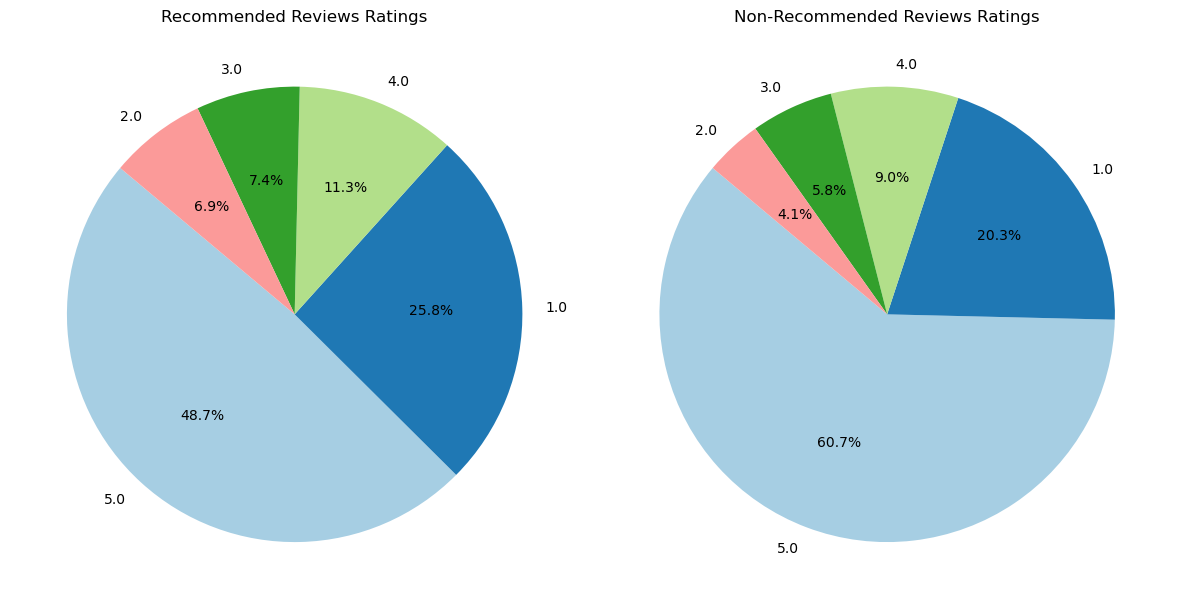

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# 分别筛选推荐评论和非推荐评论的数据
recommend_reviews = reviews[reviews['fake'] == 0]
non_recommend_reviews = reviews[reviews['fake'] == 1]

# 获取所有评分的唯一值
unique_ratings = reviews['rating'].unique()

# 设置颜色循环，确保相同评分值具有相同的颜色
colors = plt.cm.Paired(range(len(unique_ratings)))

# 绘制推荐评论的饼状图
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.gca().set_prop_cycle('color', colors)
plt.pie(recommend_reviews['rating'].value_counts(), labels=unique_ratings, autopct='%1.1f%%', startangle=140)
plt.title('Recommended Reviews Ratings')

# 绘制非推荐评论的饼状图
plt.subplot(122)
plt.gca().set_prop_cycle('color', colors)
plt.pie(non_recommend_reviews['rating'].value_counts(), labels=unique_ratings, autopct='%1.1f%%', startangle=140)
plt.title('Non-Recommended Reviews Ratings')

plt.tight_layout()
plt.show()

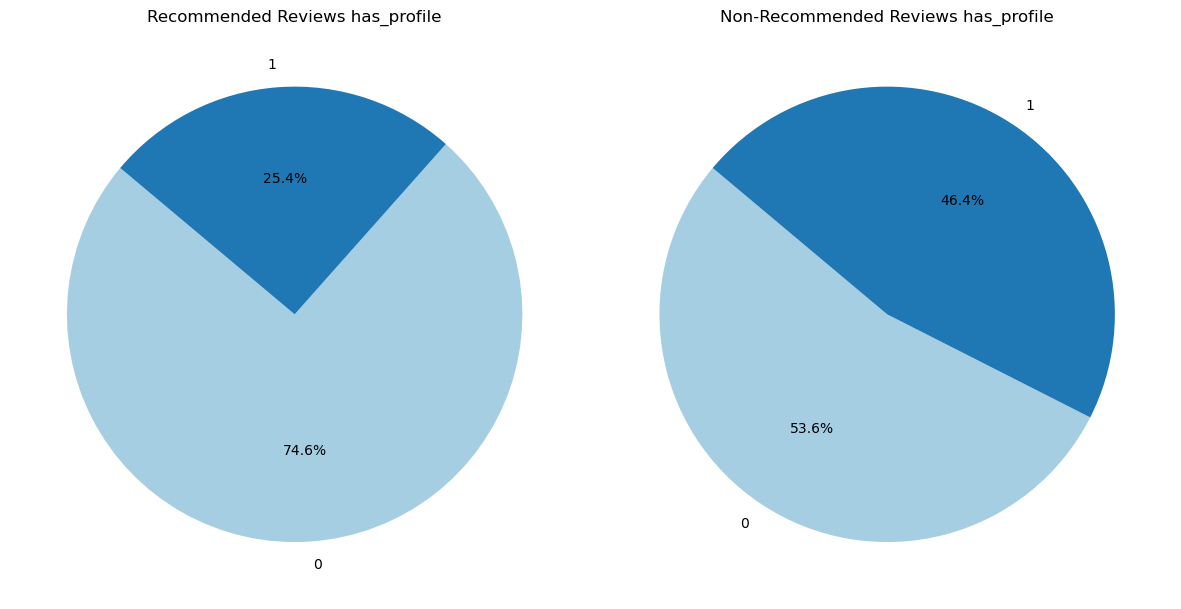

In [22]:
# 分别筛选推荐评论和非推荐评论的数据
recommend_reviews = reviews[reviews['fake'] == 0]
non_recommend_reviews = reviews[reviews['fake'] == 1]

# 获取所有评分的唯一值
unique_ratings = reviews['has_profile'].unique()

# 设置颜色循环，确保相同评分值具有相同的颜色
colors = plt.cm.Paired(range(len(unique_ratings)))

# 绘制推荐评论的饼状图
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.gca().set_prop_cycle('color', colors)
plt.pie(recommend_reviews['has_profile'].value_counts(), labels=unique_ratings, autopct='%1.1f%%', startangle=140)
plt.title('Recommended Reviews has_profile')

# 绘制非推荐评论的饼状图
plt.subplot(122)
plt.gca().set_prop_cycle('color', colors)
plt.pie(non_recommend_reviews['has_profile'].value_counts(), labels=unique_ratings, autopct='%1.1f%%', startangle=140)
plt.title('Non-Recommended Reviews has_profile')

plt.tight_layout()
plt.show()

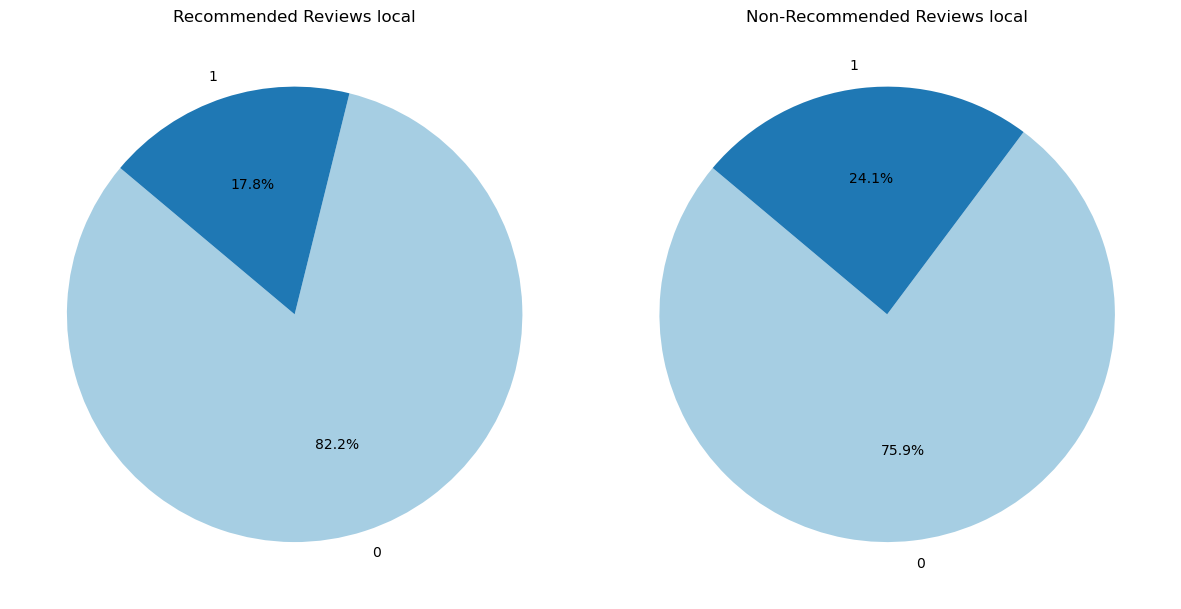

In [23]:
recommend_reviews = reviews[reviews['fake'] == 0]
non_recommend_reviews = reviews[reviews['fake'] == 1]

# 获取所有评分的唯一值
unique_ratings = reviews['local'].unique()

# 设置颜色循环，确保相同评分值具有相同的颜色
colors = plt.cm.Paired(range(len(unique_ratings)))

# 绘制推荐评论的饼状图
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.gca().set_prop_cycle('color', colors)
plt.pie(recommend_reviews['local'].value_counts(), labels=unique_ratings, autopct='%1.1f%%', startangle=140)
plt.title('Recommended Reviews local')

# 绘制非推荐评论的饼状图
plt.subplot(122)
plt.gca().set_prop_cycle('color', colors)
plt.pie(non_recommend_reviews['local'].value_counts(), labels=unique_ratings, autopct='%1.1f%%', startangle=140)
plt.title('Non-Recommended Reviews local')

plt.tight_layout()
plt.show()

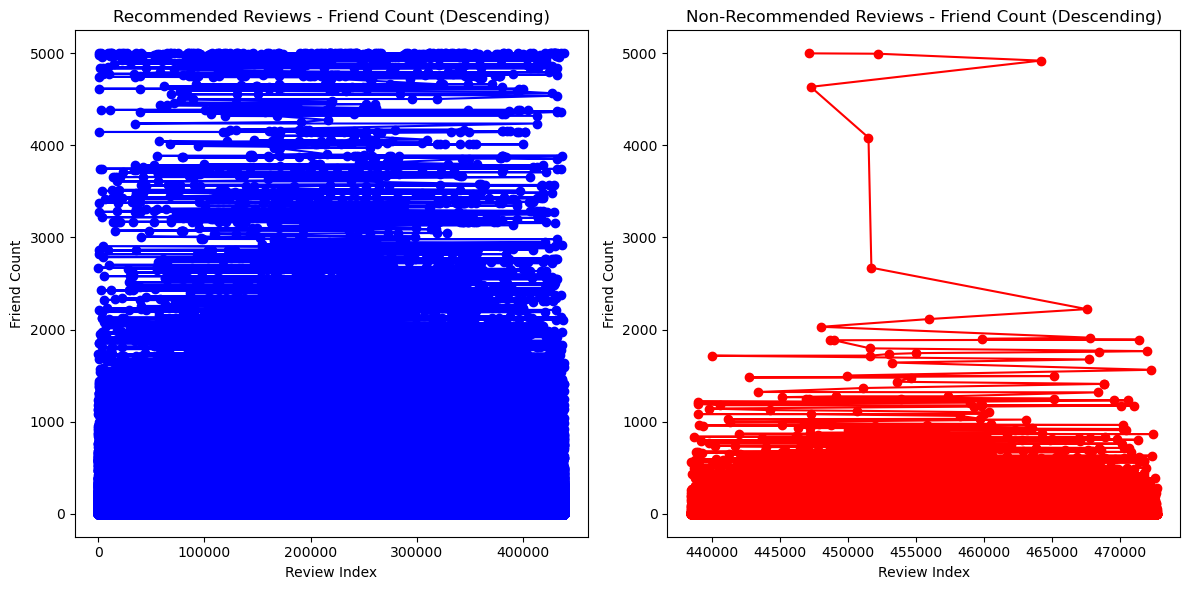

In [23]:
recommend_reviews = reviews[reviews['fake'] == 0]
non_recommend_reviews = reviews[reviews['fake'] == 1]

# 对每个数据集按照 'friend' 列降序排列
recommend_reviews = recommend_reviews.sort_values(by='friend', ascending=False)
non_recommend_reviews = non_recommend_reviews.sort_values(by='friend', ascending=False)

# 绘制推荐评论的折线图
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(recommend_reviews['friend'], marker='o', linestyle='-', color='b')
plt.title('Recommended Reviews - Friend Count (Descending)')
plt.xlabel('Review Index')
plt.ylabel('Friend Count')

# 绘制非推荐评论的折线图
plt.subplot(122)
plt.plot(non_recommend_reviews['friend'], marker='o', linestyle='-', color='r')
plt.title('Non-Recommended Reviews - Friend Count (Descending)')
plt.xlabel('Review Index')
plt.ylabel('Friend Count')

plt.tight_layout()
plt.show()

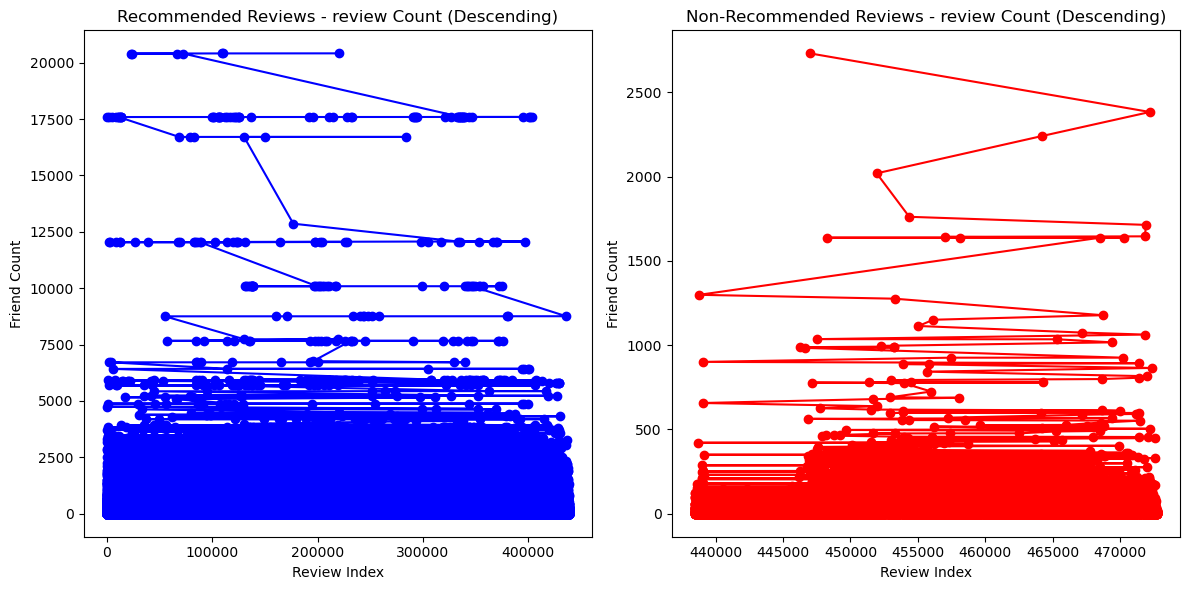

In [24]:
recommend_reviews = reviews[reviews['fake'] == 0]
non_recommend_reviews = reviews[reviews['fake'] == 1]

# 对每个数据集按照 'friend' 列降序排列
recommend_reviews = recommend_reviews.sort_values(by='review', ascending=False)
non_recommend_reviews = non_recommend_reviews.sort_values(by='review', ascending=False)

# 绘制推荐评论的折线图
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(recommend_reviews['review'], marker='o', linestyle='-', color='b')
plt.title('Recommended Reviews - review Count (Descending)')
plt.xlabel('Review Index')
plt.ylabel('Friend Count')

# 绘制非推荐评论的折线图
plt.subplot(122)
plt.plot(non_recommend_reviews['review'], marker='o', linestyle='-', color='r')
plt.title('Non-Recommended Reviews - review Count (Descending)')
plt.xlabel('Review Index')
plt.ylabel('Friend Count')

plt.tight_layout()
plt.show()

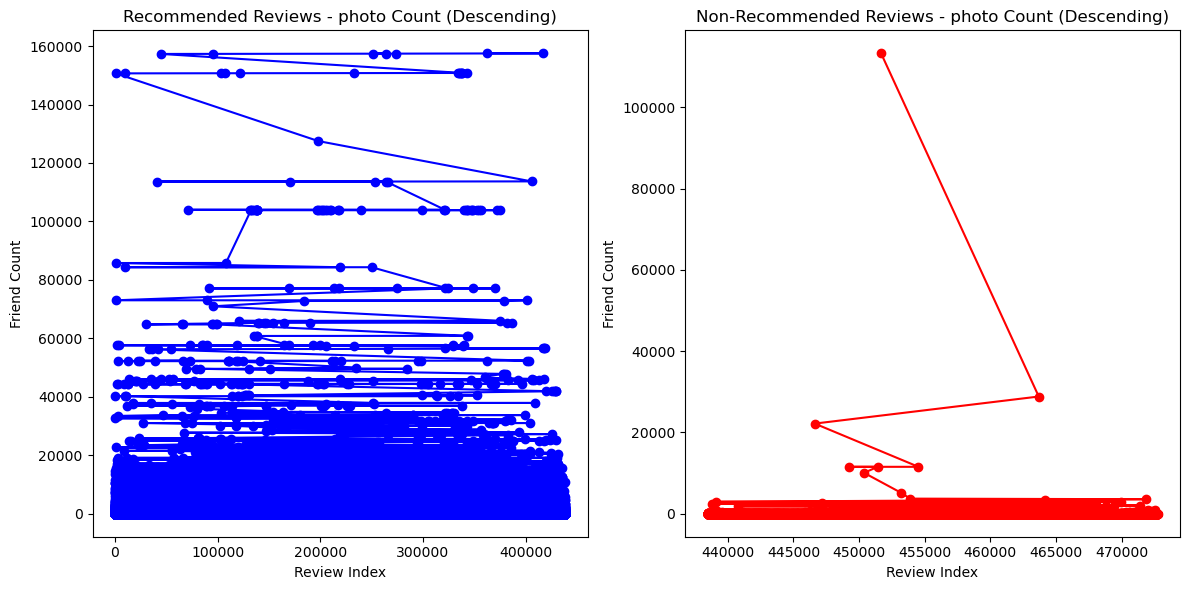

In [25]:
recommend_reviews = reviews[reviews['fake'] == 0]
non_recommend_reviews = reviews[reviews['fake'] == 1]

# 对每个数据集按照 'friend' 列降序排列
recommend_reviews = recommend_reviews.sort_values(by='photo', ascending=False)
non_recommend_reviews = non_recommend_reviews.sort_values(by='photo', ascending=False)

# 绘制推荐评论的折线图
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(recommend_reviews['photo'], marker='o', linestyle='-', color='b')
plt.title('Recommended Reviews - photo Count (Descending)')
plt.xlabel('Review Index')
plt.ylabel('Friend Count')

# 绘制非推荐评论的折线图
plt.subplot(122)
plt.plot(non_recommend_reviews['photo'], marker='o', linestyle='-', color='r')
plt.title('Non-Recommended Reviews - photo Count (Descending)')
plt.xlabel('Review Index')
plt.ylabel('Friend Count')

plt.tight_layout()
plt.show()